In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def rotate(vector, angle):
        rot_matrix = np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])
        vector = vector@rot_matrix
        return vector

def get_dist_vec(focus_pt, robot_pt, norm=True, angle=0):
    dist_vec = focus_pt - robot_pt
    if norm: 
        dist_vec = dist_vec / np.linalg.norm(dist_vec)
    dist_vec = rotate(dist_vec, angle)
    return dist_vec

# Define some points:
print(points)
# points = np.array([[0, 1, 8, 2, 2],
#                    [1, 0, 6, 7, 2]]).T  # a (nbre_points x nbre_dim) array
# print(points.shape)

# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
interpolations_methods = ['linear', 'quadratic', 'cubic']
alpha = np.linspace(0, 1, 75)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(7,7))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve.T, '-', label=method_name);

plt.plot(*points.T, 'ok', label='original points');
plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');

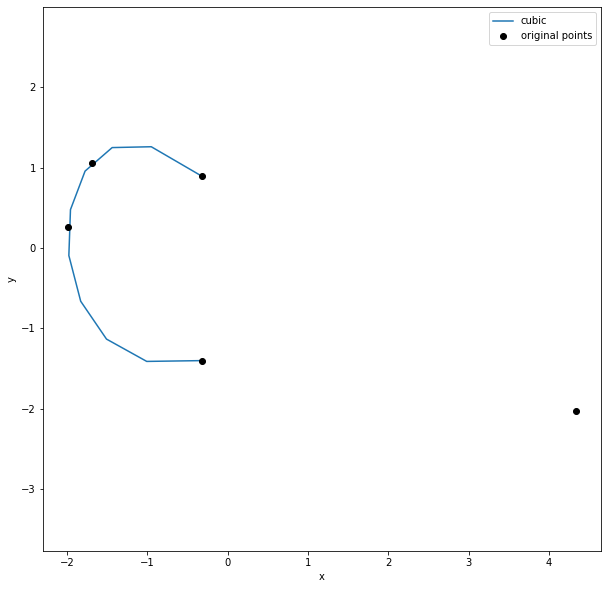

In [27]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def rotate(vector, angle):
        rot_matrix = np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])
        vector = vector@rot_matrix
        return vector

def get_dist_vec(focus_pt, robot_pt, norm=True, angle=0):
    dist_vec = focus_pt - robot_pt
    if norm: 
        dist_vec = dist_vec / np.linalg.norm(dist_vec)
    dist_vec = rotate(dist_vec, angle)
    return dist_vec

def get_bent(center, box_pos, pos1, pos2):    
#     pos_mid = get_dist_vec(box_pos, (pos1+pos2)/2, norm=True, angle=np.pi)
#     out = get_dist_vec(box_pos, center, norm=True, angle=np.pi)*1.5
#     midpt1 = pos_mid if np.linalg.norm(pos1 - pos_mid) < np.linalg.norm(pos1 - out) else out
#     midpt2 = pos_mid if np.linalg.norm(pos1 - pos_mid) >= np.linalg.norm(pos1 - out) else out  

    midpt1 = get_dist_vec(box_pos, pos1, norm=True, angle=np.pi)*2
    midpt2 = get_dist_vec(box_pos, pos2, norm=True, angle=np.pi)*2
    points = np.vstack([pos1 - center, midpt1, midpt2, pos2 - center])

    distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
    distance = np.insert(distance, 0, 0)/distance[-1]

    alpha = np.linspace(0, 1, 10)
    interpolator =  interp1d(distance, points, kind="cubic", axis=0)
    interpolated_points = interpolator(alpha)
#     interpolated_points = np.clip(interpolated_points, -2.5, 2.5)
    return interpolated_points, points
    



center = np.array([0, -9.665])
box_pos = np.array([ 4.3301, -11.695])
pos1 = np.array([-0.31988172086214, -11.0647199982142])
pos2 = np.array([-0.319897469013958, -8.7700667089591])


interpolated_points, points = get_bent(center, box_pos, pos1, pos2)
points = np.vstack([points, box_pos-center])

plt.figure(figsize=(10,10))
plt.plot(*interpolated_points.T, '-', label="cubic")
plt.plot(*points.T, 'ok', label='original points');
plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');
# plt.xlim(-3, 3)
# plt.ylim(-3,3)

In [ ]:
interpolated_points